In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [5]:
# Create a set of random latitude and longitude combinations.  DID WE HAVE TO ZIP THIS LIST?
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

620

In [12]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Processing Record 1 of Set 1 | leshukonskoye
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | batetskiy
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | amderma
City not found. Skipping...
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | songjianghe
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | turangi
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | andenes
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | lasa
Processing Record 16 of Set 1 | guasdualito
Processing Record 17 of Set 1 | ouadda
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | galle
Processing Record 21 of Set 1 | kenai
Processing Record 22 of Set 1 | clyde river
Processing Record 23 of Set 1 |

Processing Record 37 of Set 4 | saint-francois
Processing Record 38 of Set 4 | cherskiy
Processing Record 39 of Set 4 | cordoba
Processing Record 40 of Set 4 | ust-ishim
Processing Record 41 of Set 4 | merrill
Processing Record 42 of Set 4 | onverwacht
Processing Record 43 of Set 4 | norman wells
Processing Record 44 of Set 4 | shakawe
Processing Record 45 of Set 4 | inegol
Processing Record 46 of Set 4 | chipinge
Processing Record 47 of Set 4 | maragogi
Processing Record 48 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 49 of Set 4 | samusu
City not found. Skipping...
Processing Record 50 of Set 4 | zhezkazgan
Processing Record 1 of Set 5 | ponta do sol
Processing Record 2 of Set 5 | narsaq
Processing Record 3 of Set 5 | dzidzantun
Processing Record 4 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 5 | kirakira
Processing Record 6 of Set 5 | nantucket
Processing Record 7 of Set 5 | hofn
Processing Record 8 of Set 5 | kargasok
Processi

Processing Record 25 of Set 8 | zaigrayevo
Processing Record 26 of Set 8 | gainesville
Processing Record 27 of Set 8 | codrington
Processing Record 28 of Set 8 | malwan
City not found. Skipping...
Processing Record 29 of Set 8 | thaba-tseka
Processing Record 30 of Set 8 | sioux lookout
Processing Record 31 of Set 8 | george town
Processing Record 32 of Set 8 | xining
Processing Record 33 of Set 8 | kutum
Processing Record 34 of Set 8 | rwamagana
Processing Record 35 of Set 8 | nanortalik
Processing Record 36 of Set 8 | mergui
City not found. Skipping...
Processing Record 37 of Set 8 | lincoln
Processing Record 38 of Set 8 | asuncion ixtaltepec
Processing Record 39 of Set 8 | boende
Processing Record 40 of Set 8 | bosanska dubica
Processing Record 41 of Set 8 | gamba
Processing Record 42 of Set 8 | siuna
Processing Record 43 of Set 8 | strenci
Processing Record 44 of Set 8 | edson
Processing Record 45 of Set 8 | ocos
Processing Record 46 of Set 8 | ligayan
Processing Record 47 of Set 8 

Processing Record 11 of Set 12 | dangtu
Processing Record 12 of Set 12 | umm durman
City not found. Skipping...
Processing Record 13 of Set 12 | xuanhua
Processing Record 14 of Set 12 | kupang
Processing Record 15 of Set 12 | berlevag
Processing Record 16 of Set 12 | iquitos
Processing Record 17 of Set 12 | mugur-aksy
Processing Record 18 of Set 12 | xiaoweizhai
Processing Record 19 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 20 of Set 12 | clarksburg
Processing Record 21 of Set 12 | salvador
Processing Record 22 of Set 12 | volcan
Processing Record 23 of Set 12 | haines junction
Processing Record 24 of Set 12 | derzhavinsk
Processing Record 25 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 26 of Set 12 | strezhevoy
Processing Record 27 of Set 12 | deputatskiy
Processing Record 28 of Set 12 | adamovka
Processing Record 29 of Set 12 | barranca
Processing Record 30 of Set 12 | avera
Processing Record 31 of Set 12 | athabasca
Processing Record 32

In [14]:
len(city_data)

567

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Leshukonskoye,64.8989,45.7622,53.38,87,92,4.34,RU,2022-06-06 19:51:01
1,Mataura,-46.1927,168.8643,43.45,84,100,4.45,NZ,2022-06-06 19:51:02
2,Batetskiy,58.6461,30.3027,47.12,65,4,4.14,RU,2022-06-06 19:51:02
3,Port Elizabeth,-33.9180,25.5701,57.49,62,0,3.44,ZA,2022-06-06 19:51:02
4,Ilulissat,69.2167,-51.1000,37.76,58,5,10.40,GL,2022-06-06 19:51:03
5,Busselton,-33.6500,115.3333,50.85,70,0,11.79,AU,2022-06-06 19:51:03
6,Punta Arenas,-53.1500,-70.9167,37.42,93,75,13.80,CL,2022-06-06 19:50:56
7,Songjianghe,42.1859,127.4790,47.86,88,100,2.26,CN,2022-06-06 19:51:03
8,Bluff,-46.6000,168.3333,48.60,74,100,11.63,NZ,2022-06-06 19:51:04
9,Turangi,-39.0000,175.9333,49.10,98,93,1.23,NZ,2022-06-06 19:51:04


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [17]:
city_data_df = city_data_df[new_column_order]

In [18]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Leshukonskoye,RU,2022-06-06 19:51:01,64.8989,45.7622,53.38,87,92,4.34
1,Mataura,NZ,2022-06-06 19:51:02,-46.1927,168.8643,43.45,84,100,4.45
2,Batetskiy,RU,2022-06-06 19:51:02,58.6461,30.3027,47.12,65,4,4.14
3,Port Elizabeth,ZA,2022-06-06 19:51:02,-33.9180,25.5701,57.49,62,0,3.44
4,Ilulissat,GL,2022-06-06 19:51:03,69.2167,-51.1000,37.76,58,5,10.40
5,Busselton,AU,2022-06-06 19:51:03,-33.6500,115.3333,50.85,70,0,11.79
6,Punta Arenas,CL,2022-06-06 19:50:56,-53.1500,-70.9167,37.42,93,75,13.80
7,Songjianghe,CN,2022-06-06 19:51:03,42.1859,127.4790,47.86,88,100,2.26
8,Bluff,NZ,2022-06-06 19:51:04,-46.6000,168.3333,48.60,74,100,11.63
9,Turangi,NZ,2022-06-06 19:51:04,-39.0000,175.9333,49.10,98,93,1.23


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

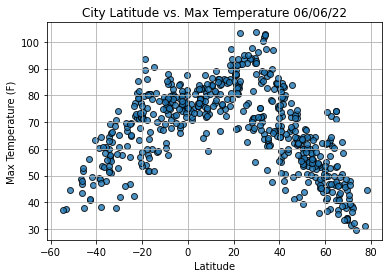

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

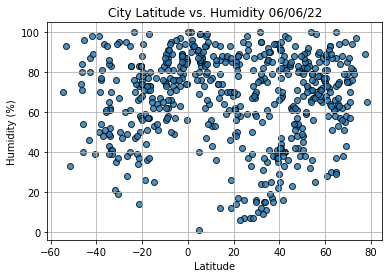

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

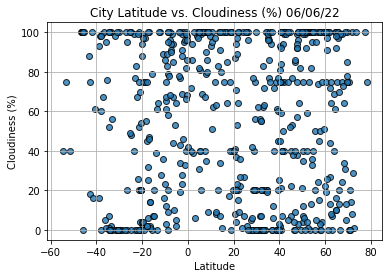

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

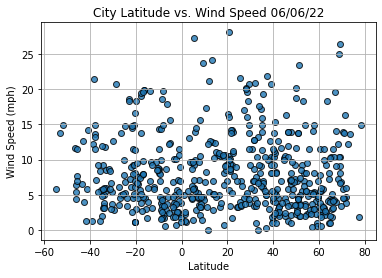

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()